In [3]:
import networkx as nx

In [4]:
import sys
sys.path.append('.')

from conformal_rigidity import certify_conformal_rigidity
from graphs import load_graph

In [ ]:
G = nx.cycle_graph(8)  # cycle graphs are edge-transitive and conformally rigid.

certified, cert_details = certify_conformal_rigidity(G)
print("Conformal Rigidity Certificate:", certified)
print("Certificate details:", cert_details)

Conformal Rigidity Certificate: True
Certificate details: ({'lambda_2': np.float64(0.5857864376269086), 'num_edges': 8, 'target_trace': np.float64(13.656854249492294), 'sdp_trace': np.float64(13.656854249490681), 'max_edge_violation': np.float64(2.611244553918368e-13), 'eigenvector_residual': np.float64(4.36193771071415e-13)}, {'lambda_n': np.float64(3.9999999999999996), 'num_edges': 8, 'target_trace': np.float64(2.0000000000000004), 'sdp_trace': np.float64(2.0000000000127054), 'max_edge_violation': np.float64(1.0718315124336186e-11), 'eigenmatrix_residual': np.float64(1.8370972330978976e-11)})


In [ ]:
for n in range(3, 40):
    G = nx.cycle_graph(n)
    assert certify_conformal_rigidity(G)[0], f"Failed for cycle graph with {n} nodes."
print("All cycle graph tests passed!") # Currently only works for up to 37 nodes, need more numerical precision to go further.

/Users/alex/Desktop/People/Austin/Conformal Rigidity/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


AssertionError: Failed for cycle graph with 37 nodes.

In [6]:
certify_conformal_rigidity(nx.complete_graph(4)) # complete graphs are conformally rigid

(np.True_,
 ({'lambda_2': np.float64(3.9999999999999964),
   'num_edges': 6,
   'target_trace': np.float64(1.5000000000000013),
   'sdp_trace': np.float64(1.5000000000122404),
   'max_edge_violation': np.float64(8.166800569142652e-12),
   'eigenvector_residual': np.float64(1.276021588802136e-13)},
  {'lambda_n': np.float64(4.0),
   'num_edges': 6,
   'target_trace': np.float64(1.5),
   'sdp_trace': np.float64(1.5000000000009188),
   'max_edge_violation': np.float64(6.17061957086662e-13),
   'eigenmatrix_residual': np.float64(1.8813924020932332e-13)}))

In [7]:
G = nx.complete_graph(4)
G.remove_edge(0, 1)
certify_conformal_rigidity(G) # removing an edge from a complete graph makes it non-conformally rigid

(False,
 ({'lambda_2': np.float64(2.000000000000001),
   'num_edges': 5,
   'target_trace': np.float64(2.499999999999999),
   'sdp_trace': np.float64(2.0000000000188987),
   'max_edge_violation': np.float64(0.6576419649233827),
   'eigenvector_residual': np.float64(0.3423580350766172)},
  None))

In [8]:
# check whether a line graph is conformally rigid
G = nx.path_graph(4)
certify_conformal_rigidity(G)

(False,
 ({'lambda_2': np.float64(0.5857864376269042),
   'num_edges': 3,
   'target_trace': np.float64(5.121320343559649),
   'sdp_trace': np.float64(5.000000000000049),
   'max_edge_violation': np.float64(9.325873406851315e-15),
   'eigenvector_residual': np.float64(1.002522136355788)},
  None))

In [4]:
G = load_graph('adjacency_lists/3-5-cage.txt')
certified, cert_details = certify_conformal_rigidity(G)
print("Conformal Rigidity Certificate:", certified)
print("Certificate details:", cert_details)

Conformal Rigidity Certificate: True
Certificate details: ({'lambda_2': np.float64(2.0), 'num_edges': 15, 'target_trace': np.float64(7.5), 'sdp_trace': np.float64(7.4999999999998), 'max_edge_violation': np.float64(1.3677947663381929e-13), 'eigenvector_residual': np.float64(7.956921131792216e-13)}, {'lambda_n': np.float64(5.000000000000003), 'num_edges': 15, 'target_trace': np.float64(2.9999999999999982), 'sdp_trace': np.float64(2.99999999999183), 'max_edge_violation': np.float64(1.5675238884682585e-11), 'eigenmatrix_residual': np.float64(8.684443533134816e-11)})


In [12]:
import numpy as np
def steinerberger_curvature(G):
    """
    Compute the Steinerberger curvature for each node in the graph G.
    """
    n = len(G.nodes)
    D = np.zeros((n, n))
    nodes = list(G.nodes)
    node_index = {node: i for i, node in enumerate(nodes)}
    
    # Compute shortest path distance matrix D
    for i, u in enumerate(nodes):
        lengths = nx.single_source_shortest_path_length(G, u)
        for v, d in lengths.items():
            j = node_index[v]
            D[i, j] = d
    
    # Solve Dw = n * 1
    ones_vector = np.ones(n)
    # w = np.linalg.solve(D, n * ones_vector)
    w = np.linalg.pinv(D) @ (n * ones_vector)
    
    # Map curvature values back to nodes
    curvature = {nodes[i]: w[i] for i in range(n)}
    total_curvature = sum(w)
    return total_curvature, curvature

(np.float64(5.142857142857142), {0: np.float64(0.8571428571428575), 1: np.float64(0.8571428571428564), 2: np.float64(0.857142857142857), 3: np.float64(0.8571428571428577), 4: np.float64(0.8571428571428569), 5: np.float64(0.857142857142857)})


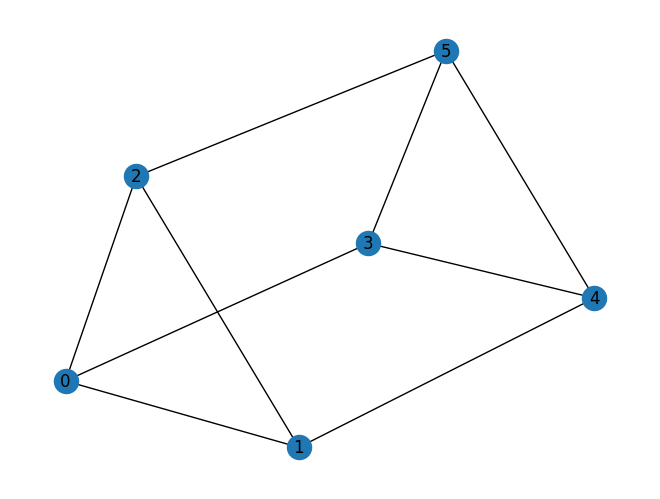

In [13]:
triangle_prism_graph = nx.Graph()
triangle_prism_graph.add_edges_from([(0, 1), (1, 2), (2, 0), (3, 4), (4, 5), (5, 3), (0, 3), (1, 4), (2, 5)])
nx.draw(triangle_prism_graph, with_labels=True)
print(steinerberger_curvature(triangle_prism_graph))

In [17]:
from graphs import compute_eigenvalues, laplacian_matrix

In [19]:
compute_eigenvalues(laplacian_matrix(triangle_prism_graph))[0][1]

np.float64(2.0000000000000027)

In [20]:
def curvature_bound(G):
    K = steinerberger_curvature(G)[0]
    n = len(G.nodes)
    l2 = compute_eigenvalues(laplacian_matrix(G))[0][1]
    w_min_lower_bound = l2 * 2 * n / K
    return w_min_lower_bound < 1, w_min_lower_bound

In [21]:
curvature_bound(triangle_prism_graph)

(np.False_, np.float64(4.666666666666673))

In [37]:
G = nx.cycle_graph(9)
G.remove_edge(0, 1)
curvature_bound(G)

(np.True_, np.float64(0.9649180674254734))

In [61]:
# cocktail party graphs: complete n-partite graphs K_{2, 2, ..., 2}
for k in range(1, 20):
    G = nx.complete_multipartite_graph(*([2] * k))
    n = len(G.nodes)
    K = 1
    l2 = compute_eigenvalues(laplacian_matrix(G))[0][1]
    w_min_lower_bound = l2 * 2 * n / K
    print(w_min_lower_bound)
    if w_min_lower_bound < 1:
        print("NOT CONFORMALLY RIGID")

0.0
NOT CONFORMALLY RIGID
16.0
48.0
95.99999999999997
160.0
239.9999999999999
335.9999999999999
447.9999999999999
575.9999999999997
719.9999999999993
879.9999999999992
1055.9999999999995
1247.999999999999
1455.9999999999975
1679.9999999999989
1919.9999999999968
2175.9999999999986
2447.9999999999986
2735.9999999999977


In [66]:
# hypercube graphs
for k in range(1, 7):
    G = nx.hypercube_graph(k)
    n = len(G.nodes)
    K = 2/k
    l2 = compute_eigenvalues(laplacian_matrix(G))[0][1]
    w_min_lower_bound = l2 * 2 * n / K
    print(w_min_lower_bound)
    if w_min_lower_bound < 1:
        print("NOT CONFORMALLY RIGID")

4.0
15.999999999999993
48.0
127.99999999999982
319.99999999999955
767.9999999999985
